## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 8: Probability and Markov Processes
## Due 27 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 8. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- Most of the section on basic graph theory is from chapter the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968. 

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of 

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).



In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

### 1. Fundamental properties

Use the definitions and basic properties of a probability function to show the following identities:

a) $P[A \oplus B] = P[A \cap \overline{B}] + P[\overline{A} \cap B]$ where $\oplus$ is the exclusive or operation. 

b) $P[A \oplus B] = P[A] + P[B] - 2 P[A\cap B]$.

***
1.a)

Recall the definition of a probability distribution:

**Def**: A **probability distribution** is a function $P : \mathcal{P}(\Omega) \rightarrow [0,1]$ such that

a) $P[A] \geq 0$

b) $P[\Omega] = 1$ (Normalizability)

c) $P[A \cup B] = P[A] + P[B]$ whenever $A \cap B = \emptyset$. (Additivity)

We begin our calculation by using the definition of exclusive-or (i.e. XOR, $\oplus$):


$$P[A \oplus B] = P[(A \cap \overline{B}) \cup (\overline{A} \cap B)].$$


1.b)

We notice that $A \cap \overline{B} = A - (A \cap B)$ and $\overline A \cap B = B - (A \cap B)$ and use the result from earlier.

- https://www.wikiwand.com/en/Symmetric_difference

***
The picture to keep in mind is:

![XOR of two sets A and B](https://upload.wikimedia.org/wikipedia/commons/4/46/Venn0110.svg)

- https://www.wikiwand.com/en/Exclusive_or

## 2. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

***
2.a)

Before we can even start, we need to find the probability of getting each face value individually. Let the weighted dice be denoted $D_1,D_2$ respectively. We're told that "1" comes up as twice as likely as any other number for both dice, so just considering any one

| n:    | 1  | 2 | 3 | 4 | 5 | 6 |
|-------|----|---|---|---|---|---|
| P[n]: | 2a | a | a | a | a | a |

holds for both dice.

Use the additivity and and normalizability axioms to find $a$.

2.b)

The probability of getting a sum of seven given that the first die comes up 1 is written:

$$P[D_1 + D_2 = 7 | D_1 = 1] = \frac{P[( D_1 = 1) \cap (D_1 + D_2 = 7)]}{P[ D_1 = 1]}$$

2.c)

The probability neither die coming up 1 is: 

$$
P[D_1\neq 1 \cap D_2 \neq 1] = P[D_1\in\{2,3,4,5,6\}\cap D_2\in\{2,3,4,5,6\}].
$$

Use independence and additivity of disjoint sets.

2.d)

Recall, the definition of the PDF:

**Def:** If $\Omega$ is discrete, then the **probability density function** (PDF) of a random variable $X$ is

$$
f_X(x) = P[\{ \omega \;|\; X(\omega) = x\}].
$$

For us $X$ is the sum of the two weighted dice, i.e. $X = D_1+D_2$

$$
\begin{align}
f_X(x) &=  0 \; \mathrm{for} \; x < 2 \\
f_X(2) &= P[D_1=1,D_2=1] = 4/49 \\
\vdots
\end{align}
$$

https://www.tablesgenerator.com/markdown_tables#

## 3. PDF and CDF

Suppose that a random variable $X$ has PDF defined by

$$
f_X(x) = \left \{
\begin{array}{ll}
a(1+x) & \; \mathrm{if} \; -1 < x \leq 0 \\
a(1-x) & \; \mathrm{if} \; 0 < x < 1 \\
0 & \; \mathrm{otherwise}.
\end{array}
\right .
$$

a) What does the value of $a$ need to be to make $f_X$ a probability distribution? Plot $f_X$ for this value.

b) Find and plot $F_X$.

c) Find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$. 

***
3.a)

Recall from lecture the **Properties of the PDF:**

a) $\int_{-\infty}^\infty f_X(x) dx = 1$

b) $F_X(x) = \sum f_X(x)$, assuming $x$ takes on discrete values. 

Thus, we can find $a$ by normalizing:

$$\begin{align}
1 &= \int^{\infty}_{-\infty} f_X(x)dx \\
\end{align}$$

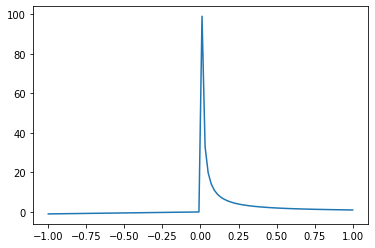

In [15]:
# An example
x = np.linspace(-1,1,100) # Has 100 points
a = 0.5

xs = x[x <= 0]
f = list(np.where(xs, xs, -a)) # f(x) where x <= 0 Only has 50 points

xs = x[x > 0]
f += list(np.where(xs, 1/xs, -a))# f(x) where x > 0 Only has 50 points

plt.plot(x,f)
plt.show()

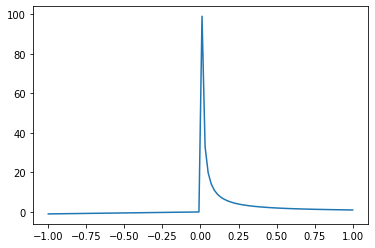

In [23]:
# Alternative Piece-wise plot 

pdf = []

def f(x):
    if x > 0:
        return 1/x
    if x < 0:
        return  x

for i in x:
    pdf.append(f(i))
    
plt.plot(x, pdf)

3.b)

The CDF can be found by integrating the PDF piecewise and adding in previous accumulations:

$$
F_X(x) = \int_{-\infty}^{x}{f_X(t)}dt \\
$$
 
We know that coming from the left, there is no probability mass until we reach the support of $f_X(x)$, so

$$
F_X(x) = 0, \; \mathrm{if} \; x\leq -1.
$$

Next on the interval $x\in(-1,0]$ we have nozero probability

$$\begin{align}
F_X(x) &= \int_{-1}^{x}{a(1+t)}dt \\
\end{align}
$$

On the interval $x\in(0,1)$ we have already accumulated some probability and also need to integrate, thus

$$\begin{align}
F_X(x) &= F_X(0) + \int_{0}^{x}{a(1-t)}dt \\
\end{align}
$$

Finally, on $x\geq 1$ all the probability mass has been accumulated so 
$$
F_X(x) = 1, \; \mathrm{if} \; x\geq 1.
$$

- https://math.stackexchange.com/questions/118742/finding-a-cdf-given-a-pdf

3.c)

In order to find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$ we need to go back to the definition of the CDF:

$$
F_X(x) = P[X \leq x]
$$
Using the fact that probabilities sum to one over all space we see:

$$
P[X > x] = 1 - P[X \leq x]. 
$$

Looking at the graph we can tell that $b$ is somewhere around $(0,\frac{1}{2})$, thus we'll use the relevant part of the CDF to find an expression for $b$:

- https://newonlinecourses.science.psu.edu/stat414/node/97/ 
- http://www.mathwave.com/articles/calculate-probability-distributions.html
- https://math.stackexchange.com/questions/1720053/how-can-a-probability-density-function-pdf-be-greater-than-1
- http://rovdownloads.com/attachments/newsletters/Newsletter%2004%20-%20Tips%20on%20Interpreting%20PDF,%20CDF,%20ICDF%20(4P).pdf

## 4. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

c) Let $Z = - \frac{1}{\lambda} \ln X$. Find and plot $F_Z$ and $f_Z$. 

***
4.a)

We know that coming from the left, there is no probability mass until we reach the support of $f_X(x)$, so

$$
F_X(x) = 0, \; \mathrm{if} \; x < 0.
$$

On the interval $x\in[0,1]$ we need to integrate.

Finally, on $x > 1$ all the probability mass has been accumulated so 
$$
F_X(x) = 1, \; \mathrm{if} \; x > 1.
$$


4.b)
We consider $u(x) = y = x^2$ and inverse transform $u^{-1}(y) = v(y) = x = \sqrt{y}$. For a strictly monotonic function of a continuous variable and on the interval of interest, $x\in[0,1], y\in[u(0),u(1)]$ we have:

$$ \begin{align}
f_Y(y) &= f_X\big(v(y)\big)|v'(y)| \\
\end{align}
$$
and we can integrate to get the CDF.

$$
F_Y(y) = \int_{0}^{\sqrt{y}}(1)dt
$$

4.c)

For $Z = - \frac{1}{\lambda} \ln X$ we define $u(X) = - \frac{1}{\lambda} \ln X= Z$ and $v(Z) = e^{-\lambda Z} = X$.

$$\begin{align}
F_Z(z) &= P[Z\leq z] \\
&= P[- \frac{1}{\lambda} \ln X \leq z] \\
&= P[\ln{X} > -\lambda z ] \\
\end{align}$$

To get the PDF we simply differentiate the CDF:

$1 = P[Z\leq z] + P[Z > z]$

GOAL:$ F_Z(z)$ on LHS and some function of$ F_X(\cdot)$

**ALTERNATIVELY**, we could procede like so:

Let $f_X(x) = 1$ on $x\in[0,1]$ and let $Z = u(x) = \frac{-1}{\lambda} \ln X$ be a $1-1$ mapping from $X = \{x : x\in[0,1]\}$ to $Z = \{z : z\geq 0\}$. This is because $u(0)=\infty$ and $u(1)=0$.

We see that $X = u^{-1}(Z) = e^{-\lambda Z}$ and $\frac{dX}{dZ} = -\lambda e^{-\lambda Z}$.

- https://newonlinecourses.science.psu.edu/stat414/node/135/
- https://newonlinecourses.science.psu.edu/stat414/node/156/
- https://newonlinecourses.science.psu.edu/stat414/node/157/
- https://newonlinecourses.science.psu.edu/stat414/node/158/
- http://web.stanford.edu/class/archive/ee/ee178/ee178.1172/hw/hw7_sn.pdf
- https://math.stackexchange.com/questions/1531572/density-of-x2-when-x-has-uniform-1-2-distribution
- https://math.stackexchange.com/questions/305997/does-the-square-of-uniform-distribution-have-density-function
- https://math.stackexchange.com/questions/2132210/let-u-be-a-uniform-random-variable-on-0-1
- http://mathforum.org/library/drmath/view/70362.html

## 5. Markov Process Properties

Consider the following three Markov Processes.

<img src="https://github.com/klavins/EE502P/blob/master/images/HW-MPs.jpeg?raw=1" width=80%>

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

***
### Definition of Markov:

**Def:** A process is **Markov** if 

$$
P[X_{k+1} = x_{k+1} \;|\; X_k = x_k, ..., X_0 = x_0 ] = P[X_{k+1} = x_{k+1} \;|\; X_k = x_k ].
$$

That is, *the probability that the next state is equal to some value is dependent only on the current state.*

**Def:** A Discrete time, discrete state Markov Process (also commonly called a **Markov Chain**) can be specified using a directed graph whose edges are labeled by a transition probability. In particular, let $G=(V,E)$ be a *directed* graph and let $Q:E \rightarrow [0,1]$ be such that for all $u \in V$

$$
\sum_{v \in \Gamma(v)} Q(u,v) = 1.
$$

With this specification, the state $X_i$ is a random variable whose values range over $V$ and

$$
P[X_{k+1} = v \;|\; X_k = u] = Q(u,v). 
$$
***

### Properties:

**Def:** A Markov Process is called **irreducible** if it is there is a path from any state to any other state. Otherwise it is called **reducible**. 

**Def:** A state $x$ has **period** $k$ if starting in state $x$, if $x$ is returned to, it is returned to in $mk$ steps for some $m$. If $k=1$ for a given state, then it is called **aperiodic**.

**Def:** A state is **transient** if there is a nonzero probability that it will not be returned to once left. Otherwise the state is called **recurrent**. 

**Def:** A state is called **absorbing** if it cannot be left once reached. A subset of states is also called **absorbing** if it cannot be left once reached. 

**Def:** A state is **ergodic** if it is aperiodic and there is a nonzero probability that it will be visited an infinite number of times in any trajectory.

***
**Remark 1**: 
If $i$ is a recurrent state, then the set of states, $A(i)$, that are accessible from $i$ form a **recurrence class,** $R$, (i.e. the states in $A(i)$ are all accessible from each other and no state outside of $A(i)$ is accessible from them.)
***
**Remark 2:** 
1. A way to verify the aperodicity of a recurrence class  $R$ is to check whether there exists a special time $n\geq 1$ and a special state $i\in R$ from which all states in $R$ can be reached in $n$ steps. This means that for states $i,j$ where $i \neq j$

$$r_{ij}(n) > 0 \text{ for } \forall j\in R.$$

2. In other words: $\forall n\in N, r_{ij}(n) = P(X_n = i|X_0 = i) > 0 \iff n \in G(i)$. This means that the set $G(i)$ contains $n$ if we can take a sequence of $n$ arrows to go from state $i$ back to state $i$. We then let
$d(i) = gcd(G(i))$. If $d(i) = 1$, the Markov Chain is aperiodic. 

   For example, in the lecture notebook, Markov Process c) has $G(i) = \{3,6,9,\dots\}$ and $d(i) = gcd(G(i)) = 3$. Thus, it's periodic with period $3$.
   
   However, Markov Process d) in the lecture notebook has $G(i) = \{1,3,4,5,6,\dots\}$ so  $d(i) = gcd(G(i)) = 1$. Thus, it is aperiodic.

#### Read this:

https://bookdown.org/probability/beta/markov-chains.html

#### Awesome book on Markov Chains and Probability Theory in general:

http://athenasc.com/probbook.html

#### Some nice, motivating resources:

- https://www.ias.ac.in/article/fulltext/reso/018/04/0368-0377
- https://michaelrzhang.github.io/assets/markovchains.pdf
- http://www.math.uchicago.edu/~may/VIGRE/VIGRE2008/REUPapers/Nordstrom.pdf

## 6. Stationary Distributions

For each Markov Process in Problem 5:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a nice plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this). 

iii) Find the left eigenvector(s) corresponding to the stationary distribution(s) of the process. If there is more than one such eigenvector, describe the space of stationary distributions as a linear combination of them.

iv) Find the reachable stationary distribution assuming $p_0(0) = 1$. 

***
6.i)

The format of these matrices is:

$$
\begin{matrix} & \text{To:} \\
\text{From:} & \begin{pmatrix}
\cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot 
\end{pmatrix}
\end{matrix}
$$

In [17]:
# 6.ii)

def dynamics(k, Q, p):
    '''
    Assumes k is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    trajectory = [p]
    for t in range(k):
        p = p @ Q
        trajectory.append(p)
    trajectory = np.matrix(trajectory).transpose()

    return trajectory

In [36]:
def Qa(sympy=True):
    '''
    Assumes:    
    Returns:
    '''
    a = 0.5
    b = 0.25
    Qa = [[0.0, a, a], [a, 0.0, a], [a, a, 0.0]]
    if sympy == True:
        Qa = sm.Matrix(Qa)
    else:    
        Qa = np.asarray(Qa)
    return Qa


In [ ]:
#Plot using the relevant code from the notes

6.iii)

Recall that a stationary probability vector  $p^*$  has the property that $p^*Q = p^*$. Thus,  $p^∗$  is a left eigenvector of  $Q$  with left eigenvalue 1. This corresponds to the **stationary distribution** of the process.

Also, a left eigenvector of $Q$ is equivalent to the transpose of a right eigenvector of $Q^T$, with the same eigenvalue. Moreover, because $det(Q-sI)=det(Q^T-sI) \implies$ the eigenvalues of the left eigenvectors of $Q$ are the same as the eigenvalues of the right eigenvectors of $Q^T$.

In [35]:
Qa(sympy=True).left_eigenvects() # Returns [(eigenval, multiplicity, eigenvector(s)),...]

[(-0.5, 2, [[-1.0  1.0  0], [-1.0  0  1.0]]), (1.0, 1, [[1.0  1.0  1.0]])]

***
6.iv)

To determine the **reachable** stationary distribution assuming $p_0(0) = 1$ (i.e. we start at node $0$), we need to use the update rule:

$$
p_{k+1} = p_k Q .
$$

Note that by substituting in $p_{k-1}Q$ and iterating, we can show that

$$
p_{k} = p_0 Q^k
$$

If we find $Q^k$ and take the limit as $k \rightarrow \infty$ we should find the steady state distribution. (If the limit exists!)

***
#### Alternative method using the eigenstructure of the update matrix:

Let $M$ be the matrix of eigenvectors of $Q$ stacked from left-to-right (called the *modal matrix*) and $\Lambda$ be the matrix of eigenvalues of $Q$. Then:

$$
\begin{align}
\Pi &= \lim \limits_{n\rightarrow \infty} Q^n \\
&= \lim \limits_{n\rightarrow \infty} (M \Lambda M^{-1})^n \\
&= \lim \limits_{n\rightarrow \infty} M \Lambda^{n} M^{-1}
\end{align}
$$

is the equilibrium probability matrix.

**Remarks:**
- The presence of more than one $\lambda(Q) = 1$ indicates the presence of **sub-Markov chains**.
- If a column in $\Pi$ is all zeros, then the state associated with that column is *transient*.
- We can partition $\Pi$ into block structures that are associated with closed sets of recurring states and transient states.

### Readings and other resources:

- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch8.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch9.pdf

- https://www.math.wustl.edu/~feres/Math450Lect04.pdf

## 7. Means and standard deviations

For each process in problem 6, find the mean and standard deviation of the value of the state in the reachable stationary distribution. For example, in process (a), the stationary distribution has all states equally likely, so the mean would be $\frac{1}{3} (0+1+2) = 1$. 

***

### Review:

The **weighted arithmetic mean** in the discrete setting is described by:

$$\mu = \frac {\sum \limits_{i=1}^n w_i x_i } {\sum \limits _{i=1}^{n}w_{i}} = E[X] = \sum_x x \;f_X(x).$$

The **variance** (which is the square of the standard deviation) is described by:

$$\sigma^2 = E[X^2] - \mu^2.$$

## 8. The Page Rank Algorithm

For the following problem, use the `networkx` `pagerank` function or find the eigenvector of the graph as a Markov Process corresponding to the eigenvector 1. Use undirected graphs.

a) Find a 10 node, connected graph in which all nodes are ranked equally or explain why such a graph does not exist.

b) Find a 10 node, connected graph in which all nodes are ranked differently or explain why such a graph does not exist.

c) Find a 10 node, connected graph in which there are two sets $A$ and $B$ of $5$ nodes for which all nodes in $A$ are ranked the same and all nodes in $B$ are ranked the same, but different from nodes in $A$. Or explain why such a graph does not exist.